## CDS ML Assignment 3
##### Group 37 - Rahul Deivasigamani (S1157698) - Joshua John Gigi (S1140063) - Anestis Pantazis (S1169388)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

from scipy.special import factorial, comb
from scipy.stats import gamma, norm

### Ex 4.1 (3.1)

In this exercise we look at some special cases of the perceptron capacity
$$
C(P,N)=2 \sum_{i=0}^{N-1}\binom{P-1}{i}
$$
to better understand the behaviour of $C$.
* Show that all problems with $P \leq N$ are linearly separable.
* Show that exactly half of the problems with $P=2N$ are linearly separable.

Hints:
* In the formula, the convention is $\binom{n}{0}=1$; $\binom{n}{k}=0$ when $n<k$ assumed.
* The formula $(1+\alpha)^n= \sum_{i=0}^n \binom{n}{i} \alpha^i$ may come in handy.

#### Solution 4.1(3.1) 
We have
- $P$ which is the number of training examples, i.e., number of patterns.
- $N$ is the number of dimensions (features).
- $C(P,N)$ is the capacity, i.e., the number of linearly separable labelings of $P$ points in $N$ dimensions.
##### 1. All problems with $P \leq N$ are linearly separable
$$
C(P,N) =
2 \sum_{i=0}^{N-1}\binom{P-1}{i}$$
$$ C(P,N) = 2 \sum_{i=0}^{P-1}\binom{P-1}{i} + 2 \sum_{i=P}^{N-1}\binom{P-1}{i}
$$

Using $\binom{n}{k}=0$ when $n<k$,

 then $\binom{P-1}{i}=0$ for $i = P, P+1, \ldots, N-1 > P-1$,
 
 so 2nd term is zero.

$$\therefore C(P,N)=2 \sum_{i=0}^{P-1}\binom{P-1}{i} 1^i$$

Using $(1+\alpha)^n= \sum_{i=0}^n \binom{n}{i} \alpha^i$,
$$C(P,N)=2(1+1)^{P-1}$$
$$=2 \cdot 2^{P-1} $$

$$\therefore C(P,N)=2^P $$
$\therefore $ all problems with $P \leq N$ are linearly separable as the capacity equals the total number of possible labelings for two classes, which is $2^P$.
##### 2. Half of the problems with $P=2N$ are linearly separable.
$$C(2N,N)=2 \sum_{i=0}^{N-1}\binom{2N-1}{i}$$
$$C(2N,N)=2 \sum_{i=0}^{2N-1}\binom{2N-1}{i}-2 \sum_{i=N}^{2N-1}\binom{2N-1}{i}$$

Since $2N-1$ is odd,

the binomial coefficients are symmetric,

$$ \therefore
\sum_{i=0}^{N-1}\binom{2N-1}{i}
\equiv \sum_{i=N}^{2N-1}\binom{2N-1}{i}= \frac{1}{2}\sum_{i=0}^{2N-1}\binom{2N-1}{i}$$

The second term can be rewritten as half of the total sum of the binomial coefficients.

$$ C(2N,N) = 2 \sum_{i=0}^{2N-1}\binom{2N-1}{i}-2 \frac{1}{2}\sum_{i=0}^{2N-1}\binom{2N-1}{i} $$
$$ C(2N,N) = \sum_{i=0}^{2N-1}\binom{2N-1}{i} $$
$$ C(2N,N) = (1+1)^{2N-1} $$

Given that $P = 2N$, 


$$\text{we have:      }C(P,N)=2^{P-1} = \frac{2^P}{2}$$

$\therefore$ exactly half of the problems with $P=2N$ are linearly separable, as the capacity is half of the total number of possible binary labelings: $2^P$.

### Ex 4.2 (3.2)

In this exercise we numerically check the formula $C(N,P)$ for the number of linearly separable problems.
* Write a computer program that implements the perceptron learning rule. Take as data $P$ random input vectors of dimension $N$ with binary components. Take as outputs random assignments $\pm 1$.
* Take $N=50$. Test empirically for individual problems that when $P < 2N$ the rule converges almost always and for $P > 2N$ the rule converges almost never.
* Reconstruct the curve $C(P,N)$ for $N=50$ as a function of $P$ in the following way. For each $P$ construct a number (`nruns`) of learning problems randomly and compute
  1. the fraction of these problems for which the perceptron learning rule converges;
  2. the mean and std of the classification error on the training set;
  3. the mean and std of the number of iterations until convergence.

Suggestions: Use $P=10,20,30, \dots, 120$; Take `nruns=100`. Decide that the algorithm does not converge when 1000 iterations has been reached.

#### Solution 4.2 (3.2)

In [12]:
seed=42
if seed is not None:
        np.random.seed(seed)

def train_perceptron(X,y,max_epochs=1000, learning_rate=1, P=8, N=50):
    w = np.zeros(N)
    b = 0.0
    
    history = [[],[]]
    for epoch in range(max_epochs):
        errors = 0
        for i in range(P):
            x_i, y_i = X[i], y[i]
            activation = np.dot(x_i,w) + b
            y_pred = 1 if activation >= 0 else -1
            
            if y_pred != y_i:
                w += learning_rate * y_i * x_i
                b += learning_rate * y_i
                errors += 1
        
        history[0].append(epoch+1)
        history[1].append(errors)
        if errors == 0:
            return 0.0, epoch+1
    
    final_activation = np.sign(np.dot(X,w) + b)
    error_fraction = np.mean(final_activation != y)
    return error_fraction, max_epochs

In [13]:
def draw_plots(P_values, convergence_fraction, mean_error, std_error, mean_iterations, std_iterations):
    plt.figure(figsize=(14, 4))

    # 1. Convergence fraction
    plt.subplot(1, 3, 1)
    plt.plot(P_values, convergence_fraction, marker='o')
    plt.xlabel("P")
    plt.ylabel("Fraction of converged runs")
    plt.title("Convergence Fraction vs P")
    plt.grid(True)

    # 2. Mean training error with std
    plt.subplot(1, 3, 2)
    plt.errorbar(P_values, mean_error, yerr=std_error, marker='o', capsize=5)
    plt.xlabel("P")
    plt.ylabel("Mean training error")
    plt.title("Training Error vs P")
    plt.grid(True)

    # 3. Mean iterations with std
    plt.subplot(1, 3, 3)
    plt.errorbar(P_values, mean_iterations, yerr=std_iterations, marker='o', capsize=5)
    plt.xlabel("P")
    plt.ylabel("Mean iterations until convergence")
    plt.title("Iterations vs P")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [14]:
errors_list = []
iterations_list = []
nruns = 100
convergence_count = 0
convergence_fraction = []
mean_error = []
std_error = []
mean_iterations = []
std_iterations = []
N=50


for p in range(10,121,10):
    for run in range(nruns):
        X = np.random.choice([-1, 1], size=(p, N))
        y = np.random.choice([-1, 1], size=p)
        error_frac, iterations = train_perceptron(X,y,P=p)
        errors_list.append(error_frac)
        iterations_list.append(iterations)
        if error_frac == 0.0:
            convergence_count += 1
    convergence_fraction.append(convergence_count / nruns)
    mean_error.append(np.mean(errors_list))
    std_error.append(np.std(errors_list))
    mean_iterations.append(np.mean(iterations_list))
    std_iterations.append(np.std(iterations_list))

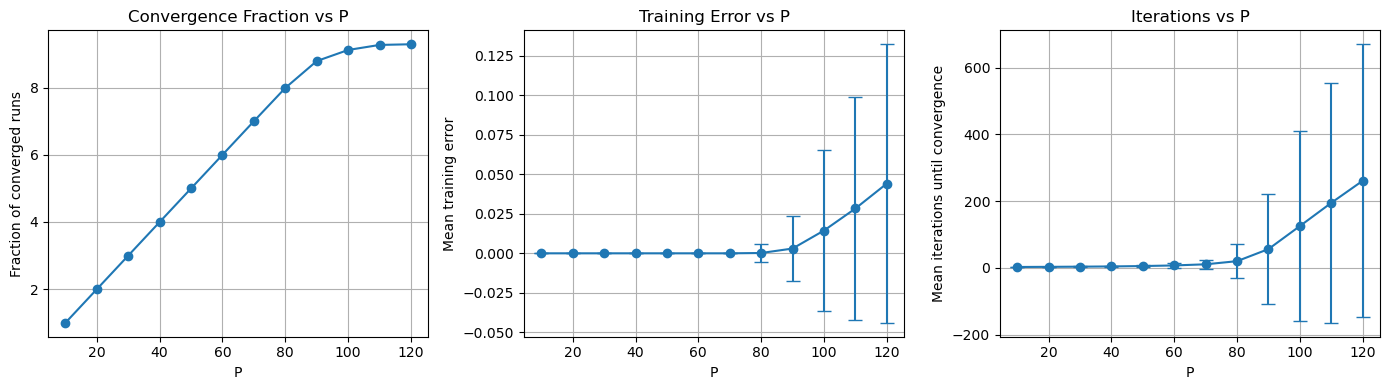

In [15]:
draw_plots(range(10,121,10), convergence_fraction, mean_error, std_error, mean_iterations, std_iterations)

### Ex 4.3 (3.3)

The number of linearly separable problems of $P$ patterns in $N$ dimensions is given by $C(N,P)$. We know that $C(N,P)=2^P$ when $P \leq N$. When $P>N$ we can use the bound
$$
C(N,P)\le \left(\frac{e P}{N}\right)^{N}
$$
Compute numerically $C(N,P)$ and its bound for $N=50$ and for $P=1$ to $P=200$.

#### Solution 4.3

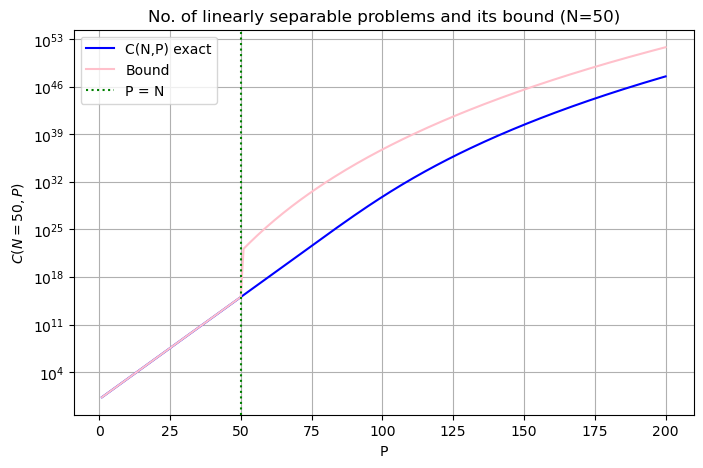

In [6]:
N = 50
P_range = np.arange(1, 200 + 1)
C_exact = np.zeros_like(P_range, dtype=float)
C_bound = np.zeros_like(P_range, dtype=float)

for idx, P in enumerate(P_range):
    if P <= N:
        C = 2 ** P
        C_exact[idx] = C
        C_bound[idx] = C
    else:
        C_exact[idx] = 2 * sum(comb(P - 1, i) for i in range(N))
        C_bound[idx] = (np.e * P / N) ** N

plt.figure(figsize=(8, 5))
plt.plot(P_range, C_exact, color = 'Blue', label='C(N,P) exact')
plt.plot(P_range, C_bound, color = 'Pink', label='Bound')
plt.axvline(x=N, color='green', linestyle=':', label='P = N')
plt.yscale('log')
plt.xlabel('P')
plt.ylabel('$C(N=50,P)$')
plt.title('No. of linearly separable problems and its bound (N=50)')
plt.grid()
plt.legend()
plt.show()

### Ex 4.4 (3.4)

The generalization bound is quite conservative. In this exercise we will verify this numerically for the perceptron. We define
$$
\delta = 4 m(2P) \exp\left(-\frac{\epsilon^2 P}{8}\right)
$$
and put it for instance to $\delta =0.01$. We can then ask what the error $\epsilon$ is for given $N$ and $P$.
We can compare this error with the generalization error that we find by numerical simulation.

In particular, suppose that data is generated from a so-called **teacher perceptron**, which is specified by an $N$ dimensional weight vector $w^\text{teacher}$. The input data are $P$
binary vectors, each of dimension $N$. So we can define the input data as a matrix $\xi$ of size $N \times P$.
We generate a training set by defining output labels $y_j = \text{sign}\left(\sum_{i=1}^N \xi_{ij} w^\text{teacher}_i\right)$.

The training data are used to train another perceptron (the so-called **student perceptron**). By construction the problem is linearly separable and therefore the perceptron learning rule will always converge and the solution will perfectly separate the two classes. Thus, in terms of the generalization bound, the student solution implements a function $f$ with $g_P(f)=1$. The probability that the generalization performance $g(f)$ of this solution is larger than $1-\epsilon$ is given by the generalization bound.

We can get a numerical estimate of the generalization error, by generating a separate test set of $P_\text{test}$ patterns with labels again computed from the teacher perceptron. The generalization error is the fraction of test patterns that are incorrectly classified by the student perceptron solution.

The student solution $f$ is not unique. Starting with a different initial weight vector, a different converged solution $f$ is obtained. In order to get a reliable numerical estimate of the generalization error, we should run the perceptron learning rule many times with different initial weight vectors and compute the average generalization error.

* Using the formula for $\delta$ above, compute an expression of $\epsilon$ in terms of $N$ and $P$ and $\delta=0.01$. Approximate $m(P)=C(N,P)$ by its bound as given in **Ex 4.3**. Compute numerically for $N=10$ the dependence of $\epsilon$ on $P$. Compute the number of patterns $P$ to ensure that $\epsilon \approx 0.1$.
  Repeat this for $N=20,30,40,50$. Note that the required number of patterns scales linearly with $N$.

* Estimate the generalization error for the teacher student perceptron learning scenario as described above. In more detail:
    - Generate input training data $\xi$ of size $N \times P$ with $\xi_{ij}$ binary $\pm 1$;
    - Define a random (but fixed) teacher vector $w^\text{teacher}$: `w_0=randn(1,n)`;
    - Compute the teacher labels $y_j$ as defined above;
    - Generate in the same way a test set $\xi_\text{test}$ of size $N \times P_\text{test}$ with $P_\text{test}=10.000$ and teacher labels;
    - Compute `n_learning_runs=100` perceptron solutions by training on the training set with $P$ samples with different initial weight vectors $w$. After convergence, the training error should be zero ($g_P(f)=1$) but the solutions are different. Compute for each solution the generalization error on the test set $\epsilon$. Use $N=10$ and $P=10,50,100,500,1000$;
    - Make a table where you compare your numerical estimates for $\epsilon$ with those given by the generalization bound ($\delta=0.01$).

#### Solution 4.4 (3.4)

$ \delta = 4 m(2P) \exp\left(-\frac{\epsilon^2 P}{8}\right) $

$ \frac{\delta}{4 m(2P)} = \exp\left(-\frac{\epsilon^2 P}{8}\right) $

$ -\frac{\epsilon^2 P}{8} = ln\frac{\delta}{4 m(2P)}$

$ \epsilon^2= \frac{8}{P}ln\frac{4 m(2P)}{\delta}$

$ \epsilon= \sqrt{\frac{8}{P}ln\frac{4 m(2P)}{\delta}}$

$ \epsilon= \sqrt{\frac{8}{P}ln\frac{4 m(2P)}{0.01}}$

$ \epsilon= \sqrt{\frac{8}{P}ln 4m(2P) \cdot 10^2}$

$ \delta = 4 m(2P) \exp\left(-\frac{\epsilon^2 P}{8}\right) $

$m(P) = C(N,P)\le \left(\frac{e P}{N}\right)^{N}$

$m(2P) = C(N,2P)\le \left(\frac{2eP}{N}\right)^{N}$

$ \delta \le 4\left(\frac{2eP}{N}\right)^{N}  \exp\left(-\frac{\epsilon^2 P}{8}\right) $

$\exp\left(\frac{\epsilon^2 P}{8}\right) = \frac{4}{\delta}\left(\frac{2eP}{N}\right)^{N}$

$\epsilon^2 = \frac{8}{P}ln\left(\frac{4}{\delta}\right)+\frac{8N}{P}ln\left(\frac{2eP}{N}\right)$

$\epsilon = \sqrt{\frac{8}{P}ln\left(\frac{4}{\delta}\right)+\frac{8N}{P}ln\left(\frac{2eP}{N}\right)}$



In [20]:
def epsilon_bound_simple(P, N, delta):
    bound = (math.e * 2 * P / N) ** N
    arg = (4.0 * bound) / delta
    val = (8.0 / P) * math.log(arg)
    if val <= 0:
        return float('nan')
    return math.sqrt(val)

N=10
delta = 0.01

P_values = list(range(10, 121, 10))
epsilons = [epsilon_bound_simple(P,N,delta) for P in P_values]

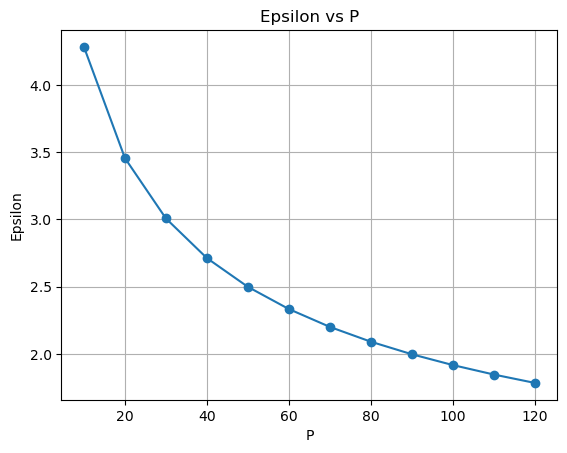

In [21]:
plt.plot(P_values, epsilons, marker='o')
plt.xlabel("P")
plt.ylabel("Epsilon")
plt.title("Epsilon vs P")
plt.grid(True)

In [22]:
target = 0.1
min_P = None
P_eps = []
min_P=[[],[]]
for N in range(10, 51, 10):
    P_eps_N = [[],[]]
    for P in range(91000, 500000):
        eps = epsilon_bound_simple(P, N, delta)
        P_eps_N[0].append(P)
        P_eps_N[1].append(eps)
        if not math.isnan(eps) and eps <= target:
            min_P[0].append(N)
            min_P[1].append(P)
            break
    P_eps.append(P_eps_N)

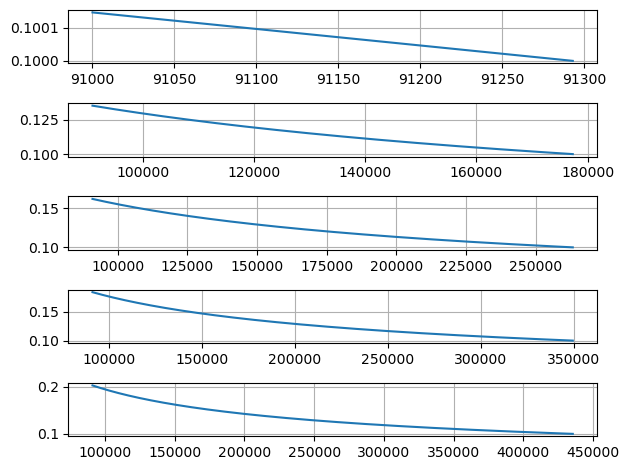

In [23]:
fig, ax = plt.subplots(5, 1)
for N in range(5):
    ax[N].plot(P_eps[N][0], P_eps[N][1])
    ax[N].grid(True)
fig.tight_layout()

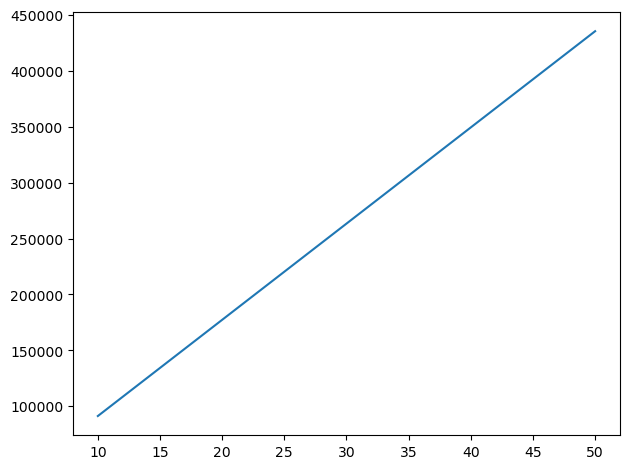

In [24]:
fig, ax = plt.subplots(1, 1)
ax.plot(min_P[0], min_P[1])
fig.tight_layout()

In [25]:
N=10
xi = np.random.choice([-1, 1], size=(P,N))
w_0 = np.random.randint(0,N, size=N)
y=[]
for j in range(P):
    activation = np.sum(np.dot(xi[j],w_0))
    y.append(1 if activation >= 0 else -1)
dataset_train = [xi,y]

In [26]:
P_test = 10000
xi_test = np.random.choice([-1, 1], size=(P_test,N))
w_0 = np.random.randint(0,N, size=N)
y_test = []
for j in range(P_test):
    activation = np.sum(np.dot(xi_test[j],w_0))
    y_test.append(1 if activation >= 0 else -1)
dataset_test = [xi_test, y_test]

In [27]:
P_list=[10,50,100,500,1000]
results = [[],[]]
n_learning_runs = 100
empirical = []
theory = []

def perceptron_train_solution(X, y, max_epochs=1000, learning_rate=1):
    """
    Train perceptron until convergence.
    X: shape (P, N)
    y: shape (P,)
    Returns final weight vector of shape (N,)
    """
    P, N = X.shape
    run_solutions = []
    for _ in range(n_learning_runs):
        b = 0.0
        w = np.random.randn(N)   # random init
        for _ in range(max_epochs):
            errors = 0
            for i in range(P):
                x_i, y_i = X[i], y[i]
                activation = np.dot(x_i,w) + b
                y_pred = 1 if activation >= 0 else -1
                
                if y_pred != y_i:
                    w += learning_rate * y_i * x_i
                    b += learning_rate * y_i
                    errors += 1
            if errors == 0:
                break
        run_solutions.append((w,b))
    return run_solutions

for P in P_list:
    print("P=",P)
    xi = np.random.choice([-1, 1], size=(P,N))
    y=[]
    for j in range(P):
        activation = np.sum(np.dot(xi[j],w_0))
        y.append(1 if activation >= 0 else -1)
    solutions = perceptron_train_solution(xi,y)
    
    gen_errors = []
    for (w,b) in solutions:
        y_pred = np.sign(xi_test @ w + b)
        y_pred[y_pred == 0] = 1
        error = np.mean(y_pred != dataset_test[1])
        gen_errors.append(error)
    empirical.append(np.mean(gen_errors))
    theory.append(epsilon_bound_simple(P,N,delta))

P= 10
P= 50
P= 100
P= 500
P= 1000


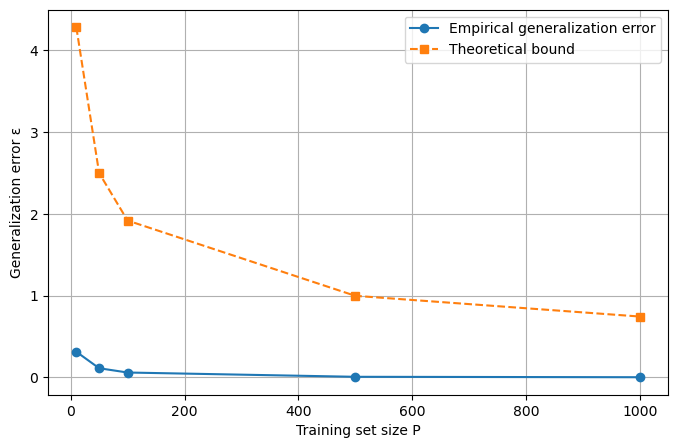

In [28]:
plt.figure(figsize=(8, 5))
plt.plot(P_list, empirical, 'o-', label="Empirical generalization error")
plt.plot(P_list, theory, 's--', label="Theoretical bound")
plt.xlabel("Training set size P")
plt.ylabel("Generalization error ε")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
empirical_data = np.array([P_list, empirical])
theoretical_data = np.array([P_list, theory])